# Introduction

In this Project, I will be filling in the role of a Machine Learning Engineer employed by an organization’s cybersecurity manager. Lately, the employees of the organization are receiving a lot of emails containing links to phishing websites. My task will be to develop an Artificial Neutral Network Model for predicting whether an email that contains a link to a website is a phishing website or not.

Background 
Phishing attacks are one of the most common types of online security threats and are capable of breaking into an organization’s online security so as to extract confidential information like user passwords, financial information, and so on. The Internet Crime Report 2018 presents the effects of phishing websites.

The  assignment is to build upon the following steps to develop a phishing websites classifier:
a) Load and understand a tabular dataset. As an ML engineer, you should be comfortable working with tabular data.
b) Query the dataset for deriving interesting reports.
c) Clean the dataset accordingly so that it is well-suited for a machine learning model.
d) Build and train an Artificial Neural Network machine learning models
e) Provide a summary of the performance of the machine learning models.

I will use a number of tools:
A number of tools will be used:

    numpy
    pandas
    matplotlib
    deep learning models


In [1]:
#Filter unecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plots to appear in notebook
%matplotlib inline
import seaborn as sns

#Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Loading the Dataset

In [3]:
phishing = pd.read_csv("Phishing.csv")
phishing.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
phishing.tail()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


The dataset contains about 31 columns each dealing with information about a URL such as the length of url, whether it used a shortening service, has a subdomain etc. It's interesting to note that data is either -1 or 1.

In [5]:
#Sample trandom 15 elements
phishing.sample(15).T

,3892,4674,10647,4546,4311,2270,7058,7404,4788,9604,9885,7739,4818,6128,3661
having_IP_Address,1,1,-1,1,1,1,-1,-1,1,-1,1,-1,1,1,1
URL_Length,-1,1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1
Shortining_Service,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1
having_At_Symbol,1,1,-1,1,1,1,1,1,1,1,1,-1,1,1,1
double_slash_redirecting,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1
Prefix_Suffix,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,1,-1,1,1,0,1,1,1,-1,0,1,0,-1,-1,1
SSLfinal_State,1,-1,1,1,1,1,-1,1,-1,-1,1,-1,1,1,1
Domain_registeration_length,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,1
Favicon,1,1,-1,1,-1,1,1,1,1,1,1,-1,1,1,1


In [6]:
# The columns

In [7]:
phishing.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [8]:
#The shape of the dataset
phishing.shape

(11055, 31)

In [19]:
#Unique values for each columns
col=phishing.columns
for i in col:
     if  i!='index':
        print(i,phishing[i].unique())

having_IP_Address [-1  1]
URL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Class [0 1]


In [9]:
phishing["Result"].unique()

array([-1,  1], dtype=int64)

The value -1 denotes phishing site and 1 denotes normal site This means that we can solve this problem as a binary classification problem in which we want to classify a site as either a phishing site or not a phishing site given the features

# Class Distribution

In [10]:
from collections import Counter
classes = Counter(phishing["Result"].values)
classes.most_common()

[(1, 6157), (-1, 4898)]

In [11]:
class_dist = pd.DataFrame(classes.most_common(), columns=["Classes", "Number of Observations"])
class_dist

,Classes,Number of Observations
0,1,6157
1,-1,4898


<AxesSubplot:xlabel='Result', ylabel='count'>

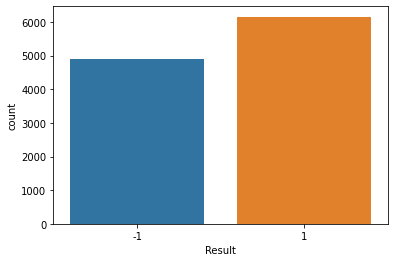

In [12]:
# Graph representation
sns.countplot(x='Result', data=phishing) #countplot shows the countof observations in each categorical bin

<AxesSubplot:>

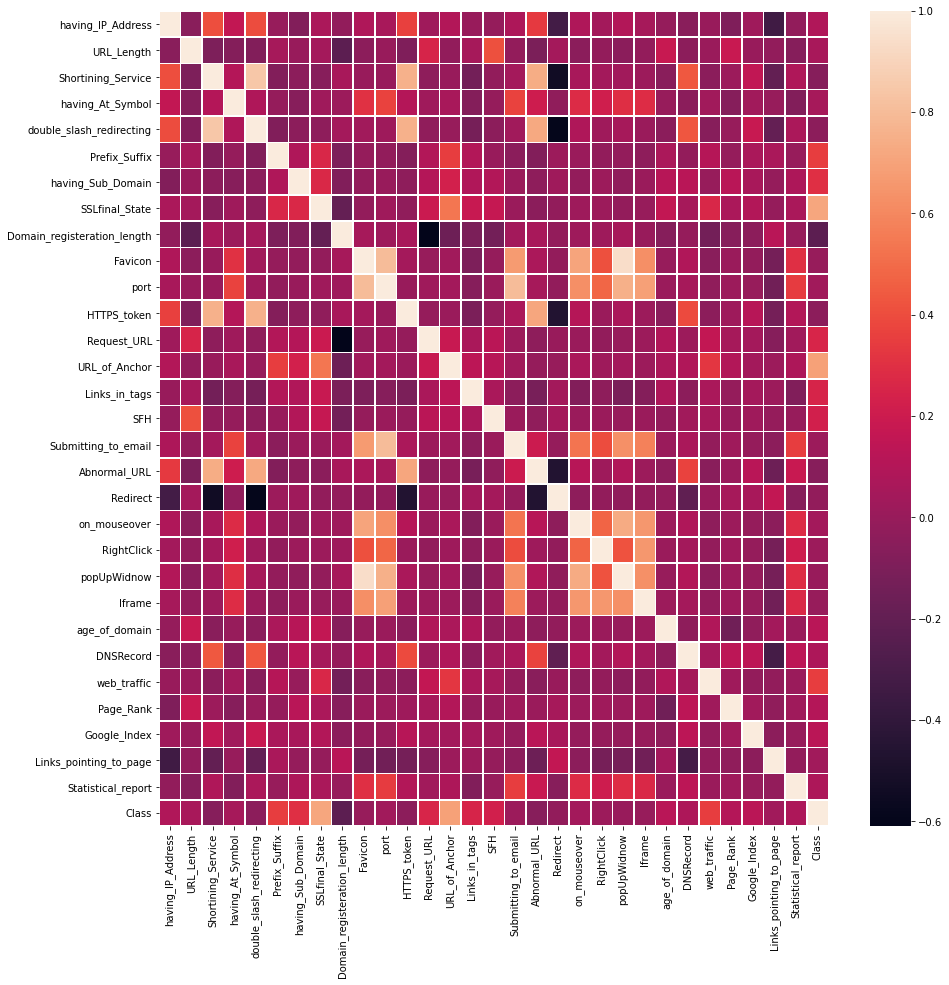

In [43]:
# Correlation
plt.figure(figsize=(15, 15))
sns.heatmap(phishing.corr(), linewidths=.5)

# Data Cleaning

It is not good practice to create ML with label values that are encoded as negative values since this affects the performance of the models


In [13]:
#changing the column name
phishing.rename(columns={'Result': 'Class'}, inplace=True)

In [14]:
#rebasing
phishing['Class'] = phishing['Class'].map({-1:0, 1:1})

In [15]:
phishing['Class'].unique()

array([0, 1], dtype=int64)

In [16]:
phishing.isna().sum() #checking for missing values

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Class     

# Model Building

In [20]:
#Spliting into train and test
X = phishing.iloc[:,:-1].values.astype(int)
y = phishing.iloc[:,-1].values.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

In [21]:
X_train.shape

(8844, 30)

In [22]:
X_test.shape

(2211, 30)

In [23]:
y_train.shape

(8844,)

In [24]:
y_train[0]

1

# Artificial Neural Network

In [67]:
# Neural network
input_dim = X_train.shape[1]
model = Sequential()
model.add(Dense(input_dim, activation='relu'))
model.add(Dense(2*input_dim, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_10 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 61        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
import datetime
logdir = "logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [57]:
from tensorflow.keras.callbacks import TensorBoard
import time
import tensorflow as tf

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [70]:
history = model.fit(X_train,y_train,batch_size=1,epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
8844/8844 [==============================] - 14s 1ms/step - loss: 0.2028 - accuracy: 0.9170
Epoch 2/10
8844/8844 [==============================] - 13s 1ms/step - loss: 0.1534 - accuracy: 0.9371 0s - los
Epoch 3/10
8844/8844 [==============================] - 13s 1ms/step - loss: 0.1386 - accuracy: 0.9410
Epoch 4/10
8844/8844 [==============================] - 13s 1ms/step - loss: 0.1214 - accuracy: 0.9493
Epoch 5/10
8844/8844 [==============================] - 13s 1ms/step - loss: 0.1131 - accuracy: 0.9495
Epoch 6/10
8844/8844 [==============================] - 13s 1ms/step - loss: 0.1031 - accuracy: 0.9528
Epoch 7/10
8844/8844 [==============================] - 13s 1ms/step - loss: 0.0988 - accuracy: 0.9559
Epoch 8/10
8844/8844 [==============================] - 13s 1ms/step - loss: 0.0923 - accuracy: 0.9591
Epoch 9/10
8844/8844 [==============================] - 13s 1ms/step - loss: 0.0902 - accuracy: 0.9600
Epoch 10/10
8844/8844 [==============================] - 13s 1ms

In [61]:
%load_ext tensorboard

In [62]:
%tensorboard --logdir logs20211208-110342

# Performance

In [71]:
# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
#Training and evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest Accuracy =', "{:.2f}".format(test_acc*100), '%')

70/70 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.9634

Test Accuracy = 96.34 %


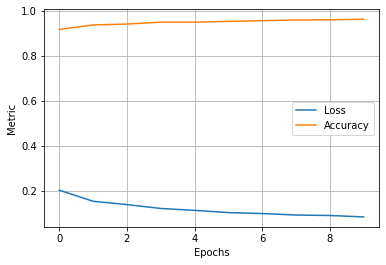

In [73]:
#Metric Visualization
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.grid(b = True)
plt.legend(['Loss', 'Accuracy'], loc = 'center right')
plt.show()

# Conclusion

The artificial neural network performed well reaching an accuracy of 96.34%